# Black Holes  

In this notebook I will be experimenting with various equations that describe black holes and their metrics.  The purpose of this will be to produce graphs or data on a spreadsheet for students to analyze at the level of a community college lab course.  Before we begin, let's import our favorite library and some important constants.

In [1]:
import numpy as np

G = 6.6743*10**(-11)
c = 299792458
M_sol = 1.98847*10**30
h = 6.62607015*10**(-34)


## 1. Analyzing Orbital Data With a Black Hole Companion

We can create a hypothetical X-ray binary system called A0811-09.  The period of this system was measured to be 0.211 days and the maximum radial velocities for the objects in the system are $V_{star} = 480 km/s$ and $V_{compact} = 23 km/s$.  Since it is an X-ray binary system, we can only see the companion object as a substantial X-ray source.

Below we plot the radial velocity curves for this system.  We generate 100 phased data points for the time and select 20 of these to generate velocities.  An random error up to 1% of the velocity value is added to make the data look more realistic.  

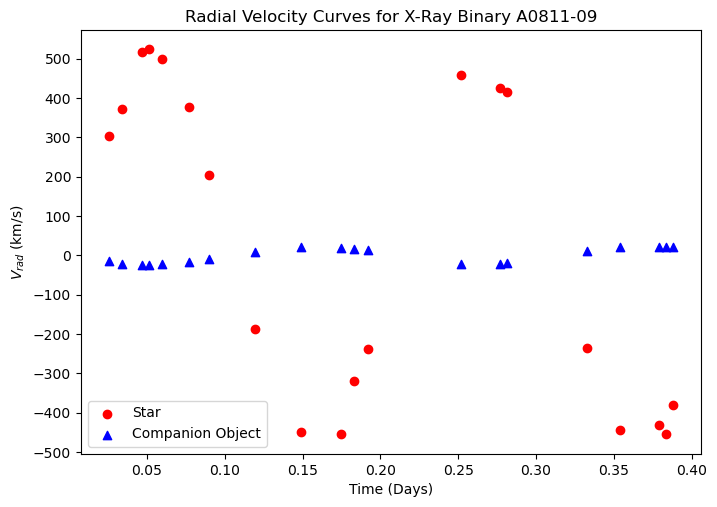

In [2]:
import matplotlib.pyplot as plt

def radial_velocity_graph(v1,v2,P):
    
    fig = plt.figure(figsize=(8,5.5))
    
    num_of_data = 20
    
    phase = np.linspace(0, 4*np.pi, 100)
    t = np.random.choice(phase.shape[0], num_of_data, replace=False)
    
    Va = v1*np.sin(phase[t]) 
    Va_noise = np.random.randint(-100, 100, num_of_data)/1000
    Va = Va + Va*Va_noise
    
    Vb = v2*np.sin(-phase[t])
    Vb_noise = np.random.randint(-100, 100, num_of_data)/1000
    Vb = Vb + Vb*Vb_noise
    
    plt.scatter(x = phase[t]*P/(2*np.pi), y = Va, color='red')
    plt.scatter(x = phase[t]*P/(2*np.pi), y = Vb, color='blue', marker = '^')
    plt.ylabel("$V_{rad}$"+" "+"(km/s)")
    plt.xlabel("Time (Days)")
    
    
    maxspeed = np.max([v1,v2])
    plt.yticks(ticks=np.linspace((-1-int(maxspeed/100))*100, (1+int(maxspeed/100))*100, 11))
    
    plt.title("Radial Velocity Curves for X-Ray Binary A0811-09")
    plt.legend(labels=["Star","Companion Object"], loc='lower left')
    
    plt.show()
    
radial_velocity_graph(480, 23, 0.211)
    
    
    

Here are some sample questions you can give to students:

1. Draw a best fitting line for both the star and the companion object

2. What is the period of this system?

3. What are the maximum radial velocities for each object?

4. What are the masses for each object in the system?  Assume i=90 and e=0  Explain why you believe that the companion object is a black hole.

5. Assuming circular orbits for each object, calculate the average seperation between the two objects in kilometers and then in astronomical units. Remember that 1 AU = 1.5x10^11m.


Numbers 1-3 are trivial.  Number 4 will use an equation given in the powerpoint, which is:

$$m_{1,2}sin^3i = \frac{1}{2\pi G}(1-e^{2})^{3/2}(V_1+V_2)^2K_{2,1}P $$

using i=90 and e=0.  Number 5 will require students to calculate the radius of a circle given $P$ and $V_{rad}$. They would convert $V_{rad}$ into meters per second, then derive the circumference of the circle the celestial objects travel in one period, finding r.  With r for each object, they can add the values together and then convert it into astronomical units.

## 2. Black Hole Evaporation Timescale

Hawking radiation is pretty cool.  For any black hole of mass $M$, it will take $t_{evap}$ to fully evaporate

$$t_{evap} = 2560\pi^{2}(\frac{2GM}{c^{2}})^{2}(\frac{M}{h})$$

So we can make a graph of this function for the students to analyze.  We can also plot the masses for known blackholes and compare their evaporation times.  A graph like this would generate 2 or 3 questions for students to analyze.  First let's code the function for the evaporation time.

In [42]:
def t_evap(M):
    
    # return M/h*2560*np.pi**2*((2*G*M)/(c**2))**2

    return 2*10**67*(M/M_sol)**3

Now we will make a graph with some extra data points for students to analyze.  We will also plot some known stellar mass black holes and supermassive blackholes, as well as where primordial blackholes would go.  The plotting function will take in a tuple of masses and blackhole names to plot along side the graph.  We normalize the y axis by finding the largest time value in our graph.  We convert it into years and reduce the evaporation times by the magnitude of the largest value.

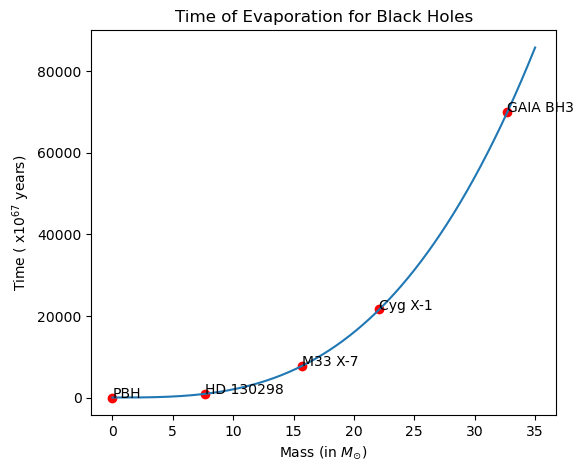

In [54]:
def plot_t_evap(points, label):
    
    M = np.linspace(0, 35, 100000)
    
    fig = plt.figure(figsize=(6,5))
    
    # scaling factors for y axis
    ymax = int(np.max(t_evap(np.array(points)*M_sol))/10**67)
    # the round function will find 10% of the magnitude of the highest value
    # scale_factor = 10**(67+len(str(ymax))-1)
    scale_factor = 10**67
    
    plt.plot(M, t_evap(M*M_sol)/scale_factor)
    
    plt.scatter(x = points, y = t_evap(np.array(points)*M_sol)/scale_factor, color='red')
    
    for i, txt in enumerate(label):
        plt.annotate(txt, (points[i], t_evap(np.array(points[i])*M_sol)/scale_factor))
        
    plt.title("Time of Evaporation for Black Holes")
    plt.xlabel("Mass (in $M_{\odot}$)")
#    plt.ylabel("Time ( x$10^{"+str(67+len(str(ymax))-1)+"}$ years)")
    plt.ylabel("Time ( x$10^{67}$ years)")
    
    plt.show()
    
NAMES = ["Cyg X-1", "HD 130298", "M33 X-7", "PBH", "GAIA BH3"]
MASSES = [22.1, 7.7, 15.7, 10**(-18), 32.7]     
    
    
plot_t_evap(MASSES, NAMES)



Here are some sample questions for the graph

1. How does the mass of a blackhole appear to scale with its evaporation time?  Relative to its mass, which kinds of blackholes will last the longest. 

2. Primordial mass black holes have estimated masses on the order of 10^11 kg.  Calculate the evaporation time for a primordial black hole of this mass, and compare your answer to the age of the universe.

3. Draw an arrow on the graph pointing to where you would label the data point for a one solar mass black hole

4. Find the evaporation times for HD 130298, M33 X-7, Cyg X-1, and GAIA BH3 using the masses on the graph.  Also write down your answer to 2 next to PBH.


## other experiments 

In [ ]:
#Proper distance graph

def prop_dist(Rs, r):    
    
    X = np.sqrt(1-Rs/r)

    return r*X+Rs/2*np.log((1+X)/(1-X))


def plot_propdist(rad):
    
    fig = plt.figure(figsize=(5,5))
    
    R_s = 1
    
    plt.plot(rad, prop_dist(R_s, rad), color='green')
    
    plt.show()

radius = np.linspace(0.01,10,100)    
plot_propdist(radius)
    


In [ ]:
#There are three values that can describe a black hole: Mass, Angular Momentum, and Electric Charge.  
#In most cases, we assume that Black Holes have neutral charge so we are left with two values.  
#Knowing the mass of a black hole does yield the maximum angular momentum the black hole can have.  

#$$J_{max}=\frac{GM^{2}}{c}$$

#Where $M$ is the mass of a black hole.  The maximum angular momentum $J_{max}$ a solar mass black hole could 
# have will be 

def angular_momentum(M):
    
    return G*M**2/c

J_sol_black_hol = angular_momentum(M_sol)

print(str(J_sol_black_hol)+" kg m²/s")


def J_plot(M):
    
    fig = plt.figure(figsize=(3.5,4))
    
    plt.plot(M, angular_momentum(M)/angular_momentum(M_sol), color='blue')
    plt.title("Mass of a Black Hole vs Maximum Angular Momentum")
    plt.xlabel("Mass (In Solar Masses)")
    plt.ylabel("Angular Momentum $J_{Max}$")
    plt.yticks([])
    
    plt.show()
    
Mx = np.linspace(0,5,50)
J_plot(Mx)

